- codificar.py: programa que oculta mensagem de texto na imagem.
- decodificar.py: programa que recupera mensagem de texto da imagem.
- imagem_entrada.png: imagem no formato PNG em que sera embutida a mensagem. ´
- imagem_saida.png: imagem no formato PNG com mensagem embutida.
- texto_entrada.txt: arquivo-texto contendo mensagem a ser oculta.
- texto_saida.txt: arquivo-texto contendo mensagem recuperada.
- plano_bits: trˆes planos de bits menos significativos representados pelos valores 0, 1 ou 2.

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math

## Read Image

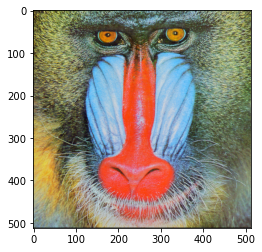

In [2]:
img = cv2.imread("baboon.png")
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(rgb_img)
plt.show()

## Convert image to binary

In [3]:
type(rgb_img)

numpy.ndarray

In [4]:
width = img.shape[0] 
height = img.shape[1]

## Converting mesage to bits

### Text to binary

In [5]:
def toBinary(string):
    binary_string = ''.join(format(ord(x), 'b').zfill(8) for x in string)
    return binary_string
#     l,m=[],[]
#     for i in a:
#         l.append(ord(i))
#     for i in l:
#         m.append(int(bin(i)[2:]))
#     return m

In [6]:
format(ord("0"), 'b').zfill(8)

'00110000'

In [7]:
#Code to find the inittial and final of message
secrect_code = "@@@"
bin_secrect_code = toBinary(secrect_code)
bin_secrect_code

'010000000100000001000000'

In [8]:
#A scratch message to test
scratch_msg = toBinary("Isabela te amo <3")
scratch_msg

'0100100101110011011000010110001001100101011011000110000100100000011101000110010100100000011000010110110101101111001000000011110000110011'

In [9]:
test_to_write = bin_secrect_code + scratch_msg + bin_secrect_code
test_to_write

'0100000001000000010000000100100101110011011000010110001001100101011011000110000100100000011101000110010100100000011000010110110101101111001000000011110000110011010000000100000001000000'

### Insert message into bits

In [10]:
# bin_msg = ""
# for char in test_to_write:
#     bin_msg+=str(char)

In [11]:
bin_msg = test_to_write

In [12]:
msg_size = len(bin_msg)
msg_size

184

In [13]:
bin_msg_int = np.array([int(char) for char in bin_msg])

In [14]:
BIT_MAP = 2

In [15]:
#Test if the image have suficient rows to mensagem
rows_mensage = int(len(bin_msg_int)/BIT_MAP)
rows_mensage

92

In [16]:
msg_formated = bin_msg_int.reshape(rows_mensage, BIT_MAP)

In [17]:
def bool2int(x):
    y = 0
    for i,j in enumerate(x):
        y += j<<i
    return y

In [18]:
msg_formated.shape

(92, 2)

## Writing mensage into image

In [19]:
def array_to_string(array):
    array = np.array2string(array)
    return ''.join(c for c in array if c.isdigit())

In [20]:
# img1[0][0]

In [21]:
img1 = img.copy()
for count, row in enumerate(msg_formated):

    pt1 = format(rgb_img[0][count][0], '08b')[:8-BIT_MAP]
    pt2 = array_to_string(row)
    img1[0][count][0] = int(pt1+pt2)

In [22]:
cv2.imwrite('baboon_text_cv2.png', img1)

True

In [23]:
np.unique(img1 == img, return_counts=True)

(array([False,  True]), array([    92, 786340], dtype=int64))

In [24]:
# cv2.imshow("image", img1)
# cv2.waitKey()

## Exctrating the text from image

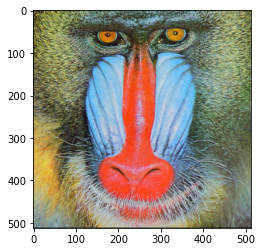

In [25]:
img_read = cv2.imread('baboon_text_cv2.png')
rgb_read_img = cv2.cvtColor(img_read, cv2.COLOR_BGR2RGB)

plt.imshow(rgb_read_img)
plt.show()

In [26]:
# img2 = img_read.copy()
list_caracteres = []

for count, row in enumerate(img_read[0]):

    list_caracteres.append(format(img_read[0][count][0], '08b')[8-BIT_MAP:])

In [27]:
import re

In [28]:
binary_channel = array_to_string(np.reshape(list_caracteres, -1))

In [29]:
extracted_text = re.search(r'010000000100000001000000(.*?)010000000100000001000000', binary_channel).group(1)

In [30]:
exctracted_list = re.findall('........?', extracted_text)

In [31]:
decifred_word = ''

for word in exctracted_list:
    decifred_word += (chr(int(word, 2)))

In [32]:
decifred_word

'Isabela te amo <3'